In [95]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
plt.style.use('fivethirtyeight')

In [96]:
# importing the data
df= pd.read_csv(r'INFY_TESTING.csv')
df= df.set_index(pd.DatetimeIndex(df['Date'].values))

In [97]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
2019-08-01,2019-08-01,790.799988,790.799988,764.799988,769.049988,725.770630,365299
2019-08-02,2019-08-02,769.000000,780.000000,762.400024,775.400024,731.763367,390658
2019-08-05,2019-08-05,773.000000,785.750000,768.250000,776.750000,733.037415,471827
2019-08-06,2019-08-06,778.000000,783.900024,770.000000,774.650024,731.055542,852181
2019-08-07,2019-08-07,779.000000,783.599976,772.349976,776.150024,732.471130,462609
...,...,...,...,...,...,...,...
2021-07-26,2021-07-26,1590.449951,1611.800049,1590.449951,1604.050049,1604.050049,154057
2021-07-27,2021-07-27,1605.000000,1608.900024,1598.099976,1602.599976,1602.599976,157809
2021-07-28,2021-07-28,1604.300049,1607.400024,1585.699951,1605.300049,1605.300049,222461
2021-07-29,2021-07-29,1610.000000,1620.000000,1605.349976,1616.849976,1616.849976,105591


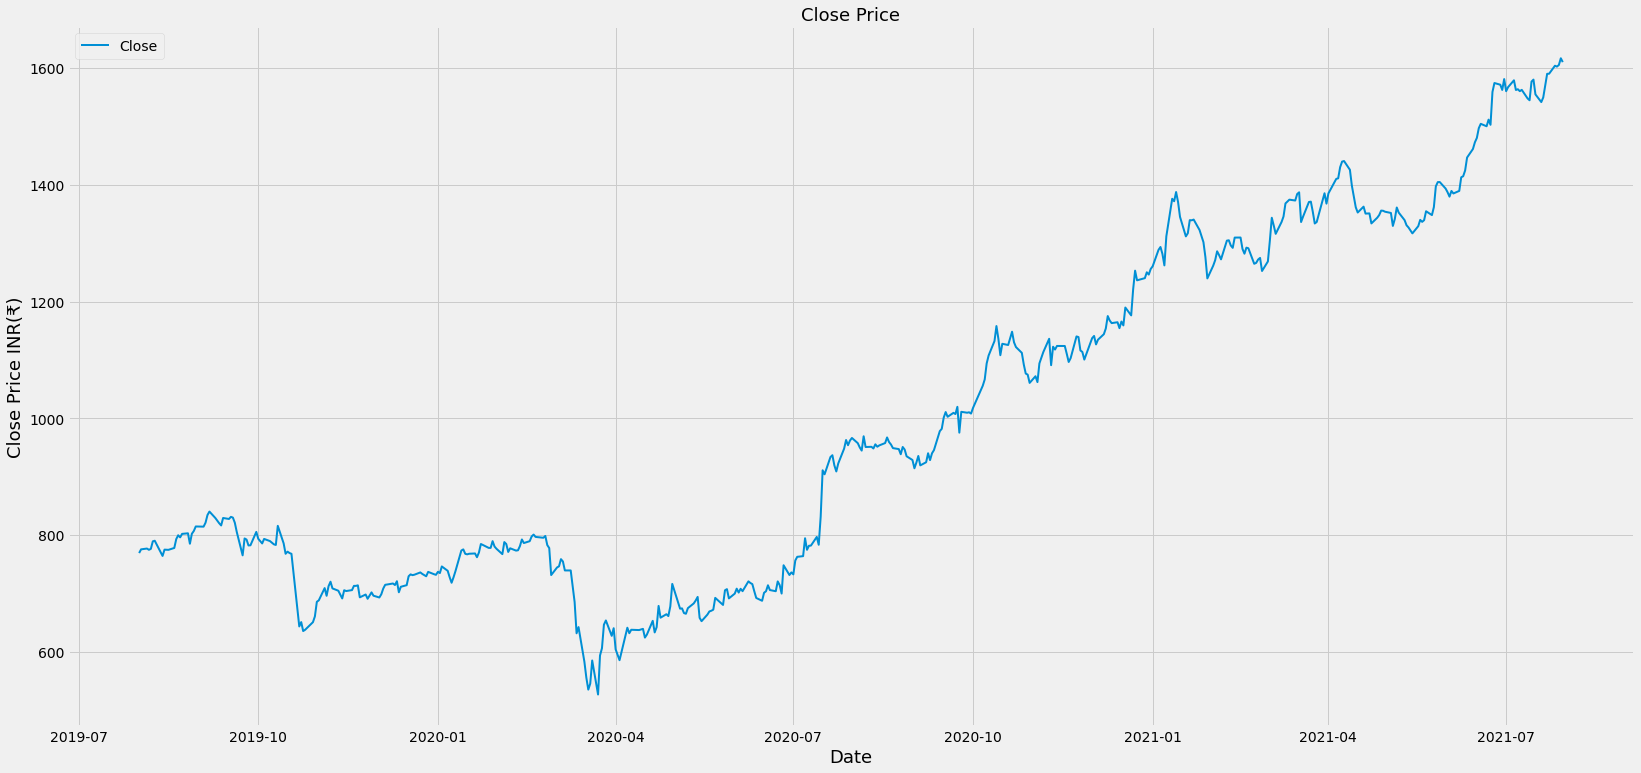

In [98]:
# Visualizing the data
plt.figure(figsize=(25,12))
plt.title('Close Price', fontsize=18)
plt.plot(df['Close'], label= 'Close',linewidth=2.0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR(₹)', fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [224]:
# Creating new dataset
data = pd.DataFrame()
data['Date'] = df['Date']
data['Close'] = df['Close']
data['SMA30'] = df['Close'].rolling(window=15).mean()
data['SMA100'] = df['Close'].rolling(window=88).mean()

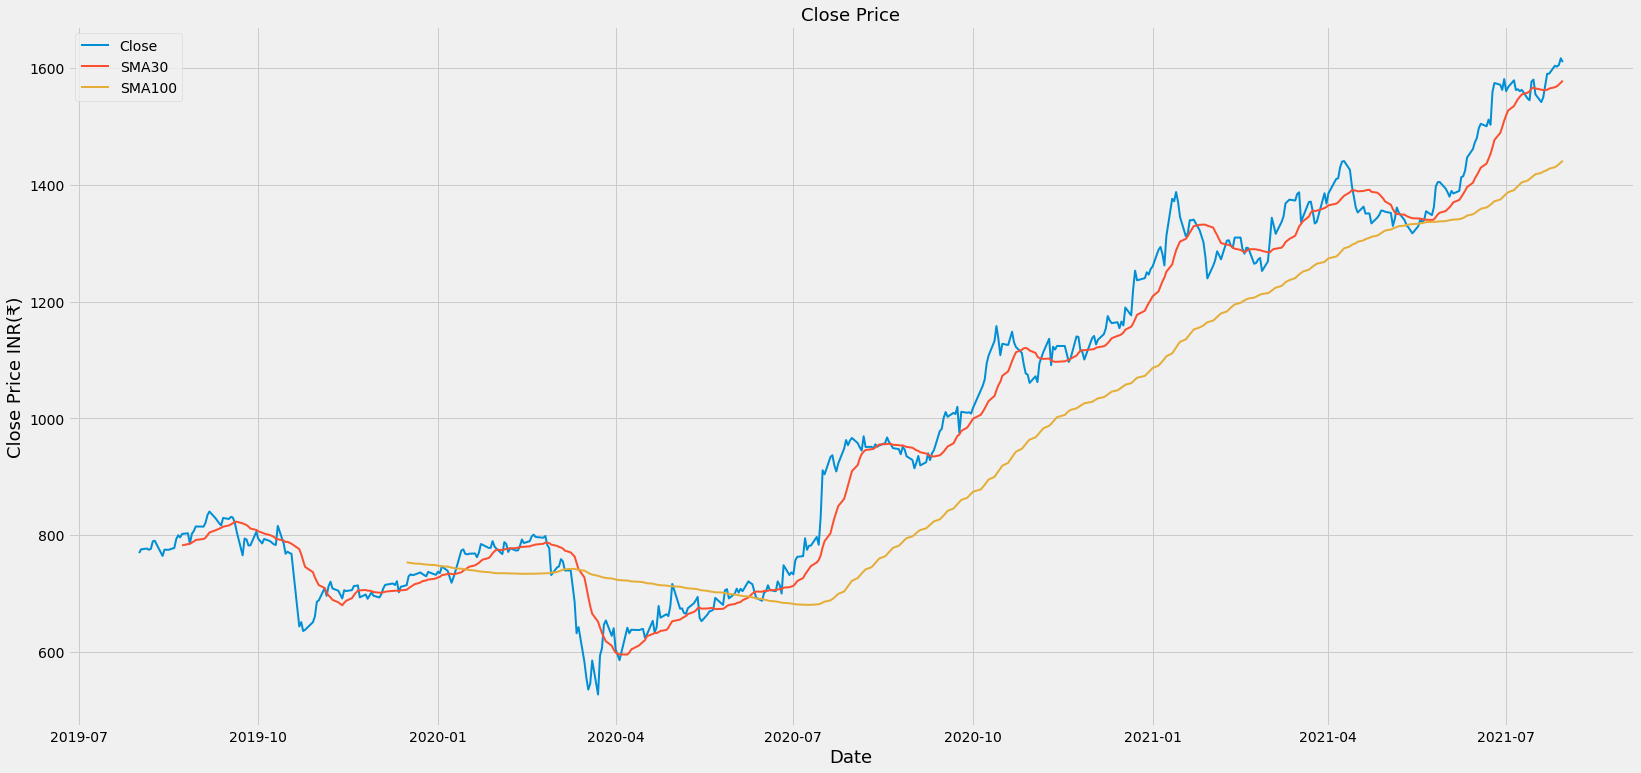

In [225]:
# Plotting all data 
plt.figure(figsize=(25,12))
plt.title('Close Price', fontsize=18)
plt.plot(data['Close'], label= 'Close', lw=2.0)
plt.plot(data['SMA30'], label = 'SMA30', lw = 2.0)
plt.plot(data['SMA100'], label = 'SMA100', lw = 2.0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR(₹)', fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [226]:
# function to determine buy sell signal price using SMA30 and SMA100
def buy_sell_sma(data):
    sigPriceBuy= []
    sigPriceSell= []
    flag= -1

    for i in range(len(data)):
        if data['SMA30'][i] < data['SMA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['Close'][i])
                sigPriceSell.append(np.nan)
                flag=1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'][i] > data['SMA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['Close'][i])
                flag=0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)

    return(sigPriceBuy,sigPriceSell)

In [227]:
buy_sell = buy_sell_sma(data)
data['Buy_Signal_Price']= buy_sell[0]
data['Sell_Signal_Price']=buy_sell[1]

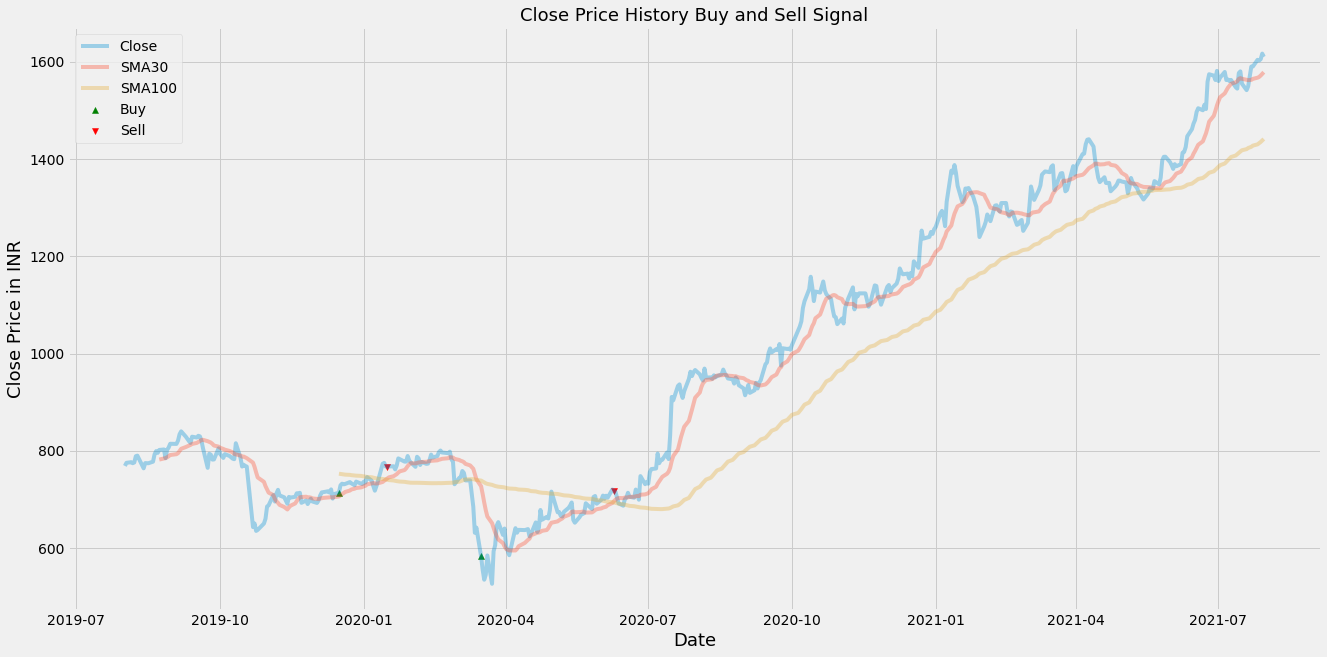

In [228]:
# plotting the buy-sell signals on the graph
plt.figure(figsize=(20,10))
plt.title('Close Price History Buy and Sell Signal', fontsize=18)
plt.plot(data['Close'], label= 'Close', alpha= 0.35)
plt.plot(data['SMA30'], label= 'SMA30', alpha= 0.35)
plt.plot(data['SMA100'], label= 'SMA100', alpha= 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label= 'Buy', marker= '^', color= 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label= 'Sell', marker= 'v', color= 'red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in INR', fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [229]:
# Writing the buy sell signals in a file

f = open('Output2.csv','w')
writer = csv.writer(f)
row = ['Date', 'Buy', 'Sell', 'Stocks Bought', 'Sell Price', 'Return%']
writer.writerow(row)
for i in range (len(data)):
    if (not np.isnan(data['Buy_Signal_Price'][i])) or (not np.isnan(data['Sell_Signal_Price'][i])):
        row= [data['Date'][i], data['Buy_Signal_Price'][i], data['Sell_Signal_Price'][i]]
        writer.writerow(row)
f.close()

In [230]:
# Given that initial capital = 100000
capital = 100000

In [231]:
# importing the buy sell signals
sigData= pd.read_csv(r'Output2.csv')
sigData= sigData.set_index(pd.DatetimeIndex(sigData['Date'].values))
sigData

,Date,Buy,Sell,Stocks Bought,Sell Price,Return%
2019-12-16,2019-12-16,714.000000,NaN,NaN,NaN,NaN
2020-01-16,2020-01-16,NaN,766.849976,NaN,NaN,NaN
2020-03-16,2020-03-16,582.849976,NaN,NaN,NaN,NaN
2020-06-09,2020-06-09,NaN,717.750000,NaN,NaN,NaN


In [232]:
stocks = 0
buy_signal = 1
sell_signal = 0
sigData['Stocks Bought'][0] = np.int(capital/sigData['Buy'][0] * 99/100)
for i in range (1, len(sigData)):
    if not np.isnan(sigData['Buy'][i]):
        buy_signal = buy_signal + 1
        stocks = np.int(sigData['Sell Price'][i-1]/sigData['Buy'][i] * 99/100)
        sigData['Stocks Bought'][i] = stocks
    elif not np.isnan(sigData['Sell'][i]):
        sell_signal = sell_signal + 1
        sp = sigData['Stocks Bought'][i-1] * sigData['Sell'][i] * 99/100
        sigData['Sell Price'][i] = sp
        returnPercent = (sp - capital)/capital * 100
        sigData['Return%'][i] = returnPercent

/tmp/ipykernel_4170/3812024943.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sigData['Stocks Bought'][0] = np.int(capital/sigData['Buy'][0] * 99/100)
/tmp/ipykernel_4170/3812024943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigData['Stocks Bought'][0] = np.int(capital/sigData['Buy'][0] * 99/100)
/tmp/ipykernel_4170/3812024943.py:13: SettingWithCopy

In [233]:
sigData

,Date,Buy,Sell,Stocks Bought,Sell Price,Return%
2019-12-16,2019-12-16,714.000000,NaN,138.0,NaN,NaN
2020-01-16,2020-01-16,NaN,766.849976,NaN,104767.043721,4.767044
2020-03-16,2020-03-16,582.849976,NaN,177.0,NaN,NaN
2020-06-09,2020-06-09,NaN,717.750000,NaN,125771.332500,25.771333


In [234]:
# Write in Output file

f = open('Output2.csv','w')
writer = csv.writer(f)
row = ['Date', 'Buy', 'Sell', 'Stocks Bought', 'Sell Price', 'Return%']
writer.writerow(row)
for i in range (0, len(sigData)):
    row= [sigData['Date'][i], sigData['Buy'][i], sigData['Sell'][i], sigData['Stocks Bought'][i], sigData['Sell Price'][i], sigData['Return%'][i]]
    writer.writerow(row)
f.close()

In [235]:
# Calculating benchmark return

benchmark = capital * data['Close'][-1]/data['Close'][0]
benchmarkPercent = (benchmark-capital)/capital * 100

# Calculate final return Percent
returnPercent = sigData['Return%'][-1]

print('Benchmark return = ', benchmarkPercent, '%')
print('Actual Return = ', returnPercent , '%')

Benchmark return =  109.38170796772707 %
Actual Return =  25.771332500000003 %


In [236]:
# Number of Buy and Sell signals generated
print('Number of Buy Signals = ', buy_signal)
print('Number of sell signals = ', sell_signal)

Number of Buy Signals =  2
Number of sell signals =  2
